In [3]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()  # Allow matplotlib have access to timestamp
import matplotlib.ticker as mplticker
import numpy as np
import scipy as sp
import scipy.stats

plt.style.use("ggplot")

# <font face="gotham" color="purple"> Rate of Change </font>

In financial or macroeconometrics, it is way more common to handle rate of change rather than level. For instance, we are more interested in the GDP growth rate rather than GDP level, or the change rate of stock index rather than its level.

## <font face="gotham" color="purple"> Single and Multi- Period Return</font>

Asset return in date $t$ while holding only one period is

$$
1+R_{t}=\frac{P_{t}}{P_{t-1}} \quad \text { or } \quad P_{t}=P_{t-1}\left(1+R_{t}\right)
$$

Or simply, this is the single period simple return

$$
R_{t}=\frac{P_{t}}{P_{t-1}}-1=\frac{P_{t}-P_{t-1}}{P_{t-1}}
$$

The return of holding assets for $k$ period is denoted as $R_t[k]$

$$
\begin{aligned}
1+R_{t}[k]=\frac{P_{t}}{P_{t-k}}&=\frac{P_{t}}{P_{t-1}} \times \frac{P_{t-1}}{P_{t-2}} \times \cdots \times \frac{P_{t-k+1}}{P_{t-k}}\\
&=\left(1+R_{t}\right)\left(1+R_{t-1}\right) \cdots\left(1+R_{t-k+1}\right) \\
&=\prod_{i=0}^{k-1}\left(1+R_{t-i}\right)
\end{aligned}
$$

Or multiperiod simple return

$$
R_t[k]=\frac{P_t-P_{t-k}}{P_{t-k}}
$$

### <font face="gotham" color="purple"> Example</font>

In [2]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime.today()

df = data.DataReader(["AAPL", "AMZN", "NFLX", "A"], "yahoo", start, end)
df_c = df["Adj Close"]

Choose all the columns <i>except</i> $\text{Agilent}$.

In [3]:
df_c.loc[:, df_c.columns != "A"].head()

Symbols,AAPL,AMZN,NFLX
Date,,,
2010-01-04,6.526021,6.6950,7.640000
2010-01-05,6.537302,6.7345,7.358571
2010-01-06,6.433317,6.6125,7.617143
2010-01-07,6.421427,6.5000,7.485714
2010-01-08,6.464118,6.6760,7.614286


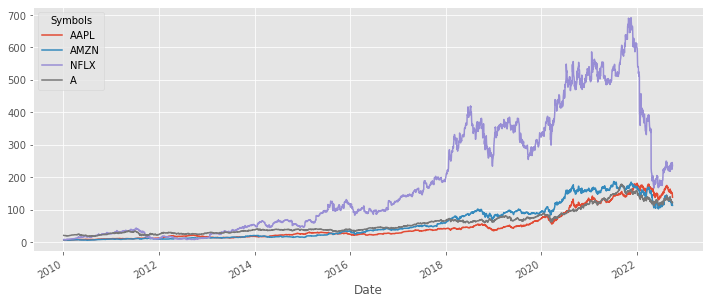

In [4]:
df_c.plot(figsize=(12, 5))
plt.show()


To calculate $1$-period return $\frac{P_{t}}{P_{t-1}}$, just divide two columns.

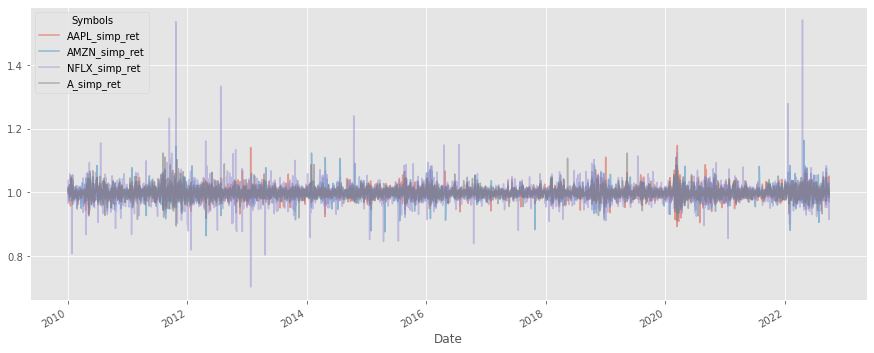

In [5]:
(df_c.shift() / df_c).add_suffix("_simp_ret").plot(alpha=0.5, figsize=(15, 6))
plt.show()

As for multiple period simple return, i.e. $\frac{P_t}{P_{t-k}}$, a simple function is written to serve this purpose, which can be found in ```tseries_func.py```.

In [6]:
def multi_period_return(df, k):
    df_kperiod = (df.shift(k) / df).add_suffix("_simp_ret_lag{}".format(k))
    df_kperiod.plot(alpha=0.5, figsize=(15, 6))
    plt.show()
    return df_kperiod

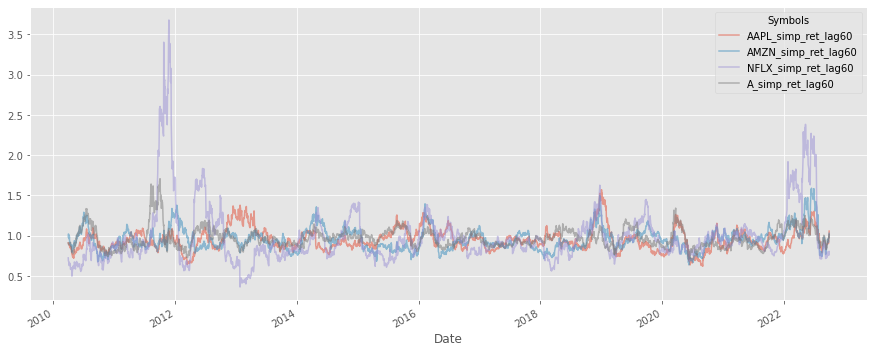

In [7]:
simp_ret = multi_period_return(df_c, 60)

## <font face="gotham" color="purple">Continuous Compounding Return</font>

The compounded return is given by the formula
$$
C(1+\frac{r}{m})^m
$$
where $C$ is the amount of capital at the beginning of the period, $r$ is the annual interest rate, $m$ is the times of paying interest.

As $m\rightarrow\infty$, the formula become a **continuous compounding**, which can be proved to be
$$
A = Ce^{rn}
$$
where $n$ is the number of years.

In [8]:
def compound_disc(C, r, m):
    A = C * (1 + r / m) ** m
    return A


def compound_con(C, r, n):
    A = C * np.exp(r * n)
    return A

We can see in the plot below that as the periods approach to infinity, the discrete compound approach to the value that continuous formula has shown.

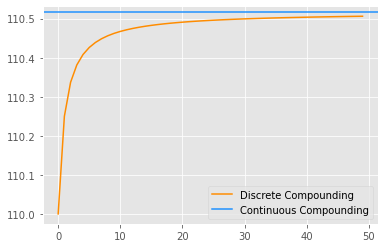

In [9]:
m = 50
A_comp_dis = []
for i in range(1, m + 1):
    A_comp_dis.append(compound_disc(100, 0.1, i))
A_comp_con = compound_con(100, 0.1, 1)

fig, ax = plt.subplots()
ax.plot(A_comp_dis, label="Discrete Compounding", color="DarkOrange")
ax.axhline(A_comp_con, label="Continuous Compounding", color="DodgerBlue")
ax.legend()
plt.show()

## <font face="gotham" color="purple">Log Return</font>

The simple gross return of one-period is $\frac{P_t}{P_{t-1}}$, taking a natural log, we call it <i>log return</i>. 

$$
\ln(1+R_t)=\ln \frac{P_t}{P_{t-1}} = p_t - p_{t-1} = r_t
$$

where $\ln P_t = p_t$. A nice property of compounded log return is that

$$
\ln (1+R_{t}[k]) = \ln \left(\frac{P_{t}}{P_{t-1}} \times \frac{P_{t-1}}{P_{t-2}} \times \cdots \times \frac{P_{t-k+1}}{P_{t-k}}\right)=r_t + r_{t-1} + r_{t-2}+...+r_{t-k+1}
$$

The formula shows that continuously compounded multiperiod return is the sum of continuously compounded one-period returns.

In [10]:
log_df_c = np.log(df_c)
df_log_ret = (log_df_c - log_df_c.shift()).add_suffix("_log_ret")

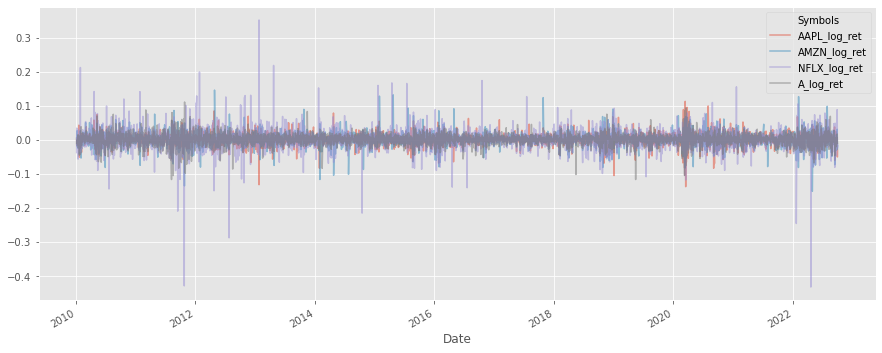

In [11]:
df_log_ret.plot(alpha=0.5, figsize=(15, 6))
plt.show()

## <font face="gotham" color="purple"> Converting Returns</font>

The relationship between single-period simple return and single-period log return is 
$$
r_t = \ln(1+R_t)
$$

The relationship between multiperiod compounded return and log return is 
$$
\begin{aligned}
1+R_t[k] &=\left(1+R_t\right)\left(1+R_{t-1}\right) \cdots\left(1+R_{t-k+1}\right), \\
r_t[k] &=r_t+r_{t-1}+\cdots+r_{t-k+1}
\end{aligned}
$$


Whenever you want to convert returns, make use of these formulae.

## <font face="gotham" color="purple"> Why Taking Logs?</font>

If a time series that exhibit consistent growth or decline, we call it **nonstationary**, taking natural logarithm is the standard practice in time series analysis. Suppose if $y_t$ is an observation of the time series in period $t$, the growth rate from period $t-1$ is
$$
g_t = \frac{y_t}{y_{t-1}}-1
$$
where $g_t$ is the growth rate. Rearrange and take natural log
$$
\ln{(1+g_t)}=\ln{\bigg(\frac{y_t}{y_{t-1}}\bigg)}=\ln{y_t}-\ln{y_{t-1}}
$$
So the question is what is $\ln{(1+g_t)}$?

In calculus class, we have learned **Taylor Expansion**, which is the ultimate weapon for approximating any functions. 
$$
\ln (1+x)=x-\frac{1}{2} x^{2}+\frac{1}{3} x^{3}-\frac{1}{4} x^{4}+\ldots=\sum_{k=1}^\infty(-1)^{k+1}\frac{x^k}{k}
$$

Because growth rates in economics or finance usually are small, we can retain the linear term from Taylor expansion, i.e.
$$
\ln{(1+x)}\approx x
$$
which means log difference approximates the growth rate
$$
\ln{y_t}-\ln{y_{t-1}} \approx g_t
$$

Let's take a look at real GDP per capita from US.

In [30]:
start = dt.datetime(1950, 1, 1)
end = dt.datetime.today()
df = pdr.data.DataReader(["A939RX0Q048SBEA"], "fred", start, end)
df.columns = ["R_GDP_PerCap"]
df["R_GDP_PerCap_tm1"] = df["R_GDP_PerCap"].shift(1)  # tm1 means t minus 1
df = df.dropna()

In [16]:
# pd.options.mode.chained_assignment = None # without this, possibly there will be error msg 'A value is trying to be set on a copy of a slice from a DataFrame.'
df["Gr_rate"] = df["R_GDP_PerCap"] / df["R_GDP_PerCap_tm1"]
df["Gr_rate"] = df["Gr_rate"] - 1
df.head()

,R_GDP_PerCap,R_GDP_PerCap_tm1,Gr_rate
DATE,,,
1950-04-01,14889.0,14500.0,0.026828
1950-07-01,15398.0,14889.0,0.034186
1950-10-01,15623.0,15398.0,0.014612
1951-01-01,15769.0,15623.0,0.009345
1951-04-01,15979.0,15769.0,0.013317


However, as you have seen in previous tasks, a convenient method ```.pct_change``` can return the rate of change.

In [19]:
df["Gr_rate_pandas"] = df["R_GDP_PerCap"].pct_change()

Exact the same results as manual calculation.

In [18]:
df.head()

,R_GDP_PerCap,R_GDP_PerCap_tm1,Gr_rate,Gr_rate_pandas
DATE,,,,
1950-04-01,14889.0,14500.0,0.026828,NaN
1950-07-01,15398.0,14889.0,0.034186,0.034186
1950-10-01,15623.0,15398.0,0.014612,0.014612
1951-01-01,15769.0,15623.0,0.009345,0.009345
1951-04-01,15979.0,15769.0,0.013317,0.013317


Now calculate the log difference. 

In [31]:
df["Gr_rate_log_approx"] = np.log(df["R_GDP_PerCap"]) - np.log(df["R_GDP_PerCap_tm1"])

The charts below shows the difference between division growth rate $g_t = \frac{y_t}{y_{t-1}}-1$ and log difference growth rate $\tilde{g}_t\approx \ln{y_t}-\ln{y_{t-1}} $

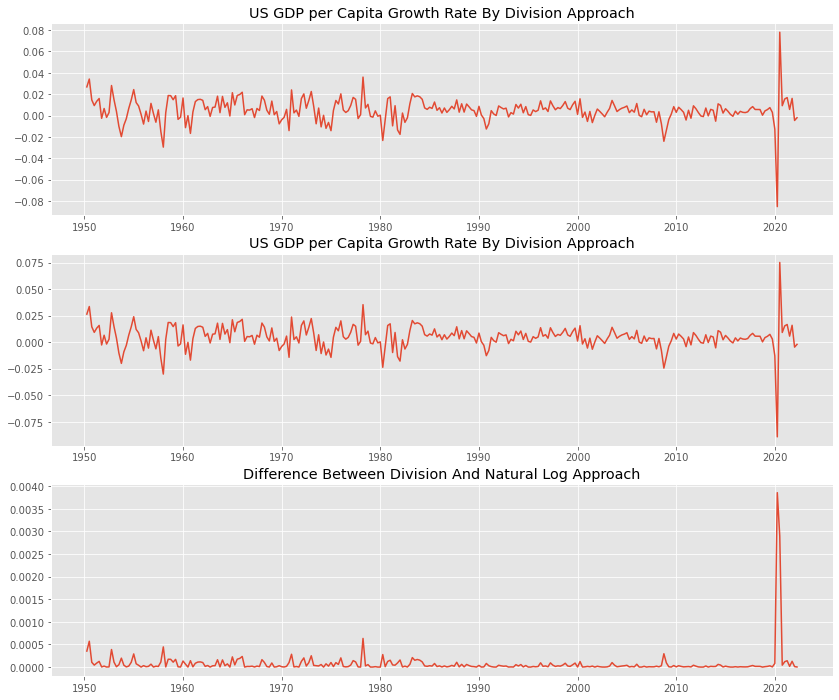

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 12))
ax[0].plot(df["Gr_rate"])
ax[0].set_title("US GDP per Capita Growth Rate By Division Approach")

ax[1].plot(df["Gr_rate_log_approx"])
ax[1].set_title("US GDP per Capita Growth Rate By Division Approach")

ax[2].plot(df["Gr_rate"] - df["Gr_rate_log_approx"])
ax[2].set_title("Difference Between Division And Natural Log Approach")
plt.show()

Also the log difference growth rate will consistently underestimate the growth(change) rate, however the differences are negligible, mostly are under $5$ basis points, especially post 1980s period, the log difference grow rate approximate real growth rate considerably well. The only exception is the rebound during Covid pandemic, more than $40$ basis points ($0.04\%$).

## <font face="gotham" color="purple"> How Reliable Is The Natural Log Transformation?</font>

We create a series from $0$ to $.8$ with step of $.01$, which means the growth rate ranging from $0\%$ to $80
\%$ with step of $1\%$. The first plot is the comparison of division and natural log approach, as they increase the discrepancy grow bigger too, the second plot is the difference of two approaches.

As long as growth(change) rate is less than $20\%$, the error of natural log approach is acceptable.

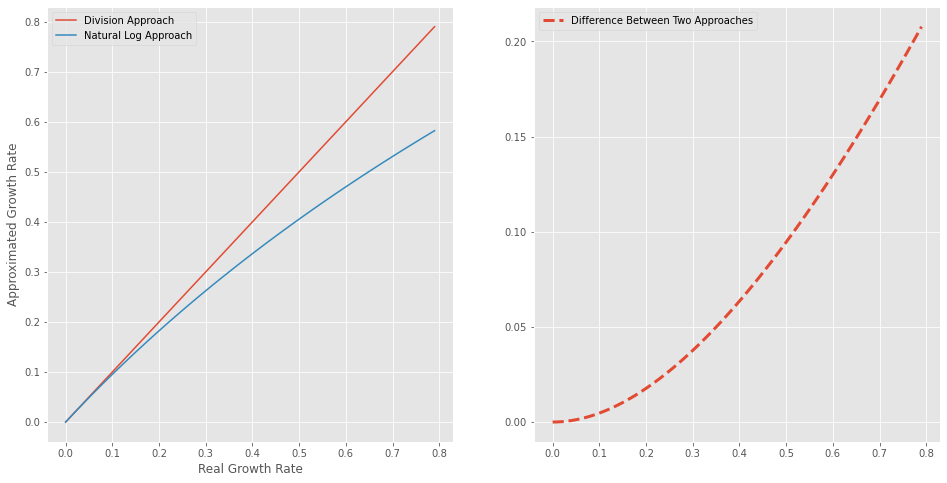

In [33]:
g = np.arange(0, 0.8, 0.01)
log_g = np.log(1 + g)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].plot(g, g, label="Division Approach")
ax[0].plot(g, log_g, label="Natural Log Approach")
ax[0].set_xlabel("Real Growth Rate")
ax[0].set_ylabel("Approximated Growth Rate")
ax[0].legend()

ax[1].plot(g, g - log_g, ls="--", lw=3, label="Difference Between Two Approaches")
ax[1].legend()
plt.show()

## <font face="gotham" color="purple"> Inflation-Adjusted Return</font>

## <font face="gotham" color="purple"> Distribution of Returns, Kurtosis and Skewness</font>

Before plotting the distribution of returns, there are two statistics to refresh.

SciPy use **excess kurtosis** rather than kurtosis, thus the standard normal distribution has kurtosis of $0$, not $3$! Positive value means heavy-tailed, negative means light-tailed.

In [12]:
pd.DataFrame(df_c.pct_change().kurtosis(), columns=["Kurtosis"])

,Kurtosis
Symbols,
AAPL,5.223052
AMZN,6.775435
NFLX,23.920704
A,4.672377


As for the **skewness**, positive value means skew to the right. From the info of skewness, Netflix was probably the most profitable one.

In [13]:
pd.DataFrame(df_c.pct_change().skew(), columns=["Skewness"])

,Skewness
Symbols,
AAPL,-0.108104
AMZN,0.254877
NFLX,0.324497
A,-0.248248


Plot the histogram of the one-day simple return of three stocks.

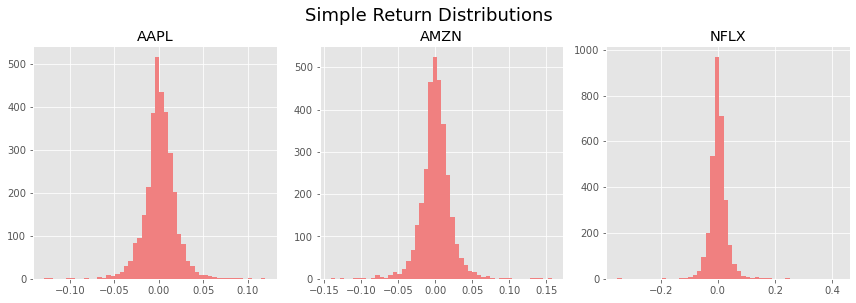

In [14]:
fig = plt.figure(figsize=(12, 4))
stocks = ["AAPL", "AMZN", "NFLX"]
for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.hist(df_c.pct_change().dropna()[stocks[i]], bins=50, color="LightCoral")
    ax.set_title(stocks[i])
# fig.tight_layout(pad=1.0)
fig.tight_layout()  # subplot spacing
plt.suptitle("Simple Return Distributions", x=0.5, y=1.04, size=18)
plt.show()

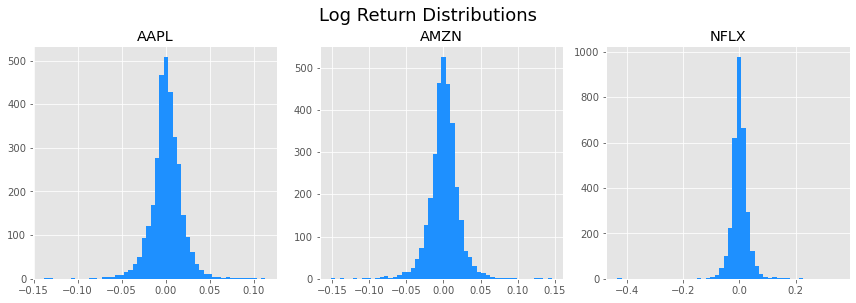

In [15]:
fig = plt.figure(figsize=(12, 4))
stocks = ["AAPL", "AMZN", "NFLX"]
for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.hist(
        (log_df_c - log_df_c.shift()).dropna()[stocks[i]], bins=50, color="DodgerBlue"
    )
    ax.set_title(stocks[i])
fig.tight_layout()  # subplot spacing
plt.suptitle("Log Return Distributions", x=0.5, y=1.04, size=18)
plt.show()

Visually, the log returns are more normally distributed, and the statistics show that log return are also less heavy-tailed and less skewed.

In [16]:
pd.DataFrame(df_log_ret.kurtosis(), columns=["Kurtosis"])

,Kurtosis
Symbols,
AAPL_log_ret,5.524570
AMZN_log_ret,6.505239
NFLX_log_ret,29.514946
A_log_ret,4.887203


In [17]:
pd.DataFrame(df_log_ret.skew(), columns=["Skewness"])

,Skewness
Symbols,
AAPL_log_ret,-0.304945
AMZN_log_ret,-0.008357
NFLX_log_ret,-1.039946
A_log_ret,-0.429058


## <font face="gotham" color="purple"> $t$-test for Mean of Sample</font>

We want to test some hypotheses, if sample means of log return statistically different from zero

$$
H_0:\quad \mu_0 = 0\\
H_1:\quad \mu_0\neq 0
$$

The $t$-test is constructed by

\begin{equation}
t = \frac{\bar{x}-\mu_0}{s/\sqrt{n}}
\end{equation}

In [18]:
df_c_desc = df_c.describe()  # descriptive statistics

In [19]:
stocks = ["AAPL", "AMZN", "NFLX"]
for i in range(3):
    t = df_c_desc.loc["mean", stocks[i]] / (
        df_c_desc.loc["std", stocks[i]] / np.sqrt(df_c_desc.loc["count", stocks[i]])
    )
    s = "t-statistic of stock " + stocks[i] + " is {0:.4f}."
    print(s.format(t))

t-statistic of stock AAPL is 58.1079.
t-statistic of stock AMZN is 60.6570.
t-statistic of stock NFLX is 58.6551.


We can of course use SciPy built-in function. The minor difference is caused by some unbiased adjustification in SciPy.

In [20]:
H0 = 0
stocks = ["AAPL", "AMZN", "NFLX"]
for i in range(len(stocks)):
    t, pvalue = sp.stats.ttest_1samp(df_c_desc.dropna()[stocks[i]], popmean=H0)
    s = "t-statistic of stock " + stocks[i] + " is {0:.4f} and p-value is {1:.4f}%."
    print(s.format(t, pvalue * 100))

t-statistic of stock AAPL is 1.1356 and p-value is 29.3522%.
t-statistic of stock AMZN is 1.1602 and p-value is 28.4019%.
t-statistic of stock NFLX is 1.5548 and p-value is 16.3948%.


However, the implications are the same: the data of AAPL, AMZN, NFLX and TSLA rejected $H_0: \mu = 0$.

### <font face="gotham" color="purple"> Change of Frequency </font>

We have seen how to upsample or downsample frequency in previous chapter, here we will use the characteristics of log return to change the frequency of the series.

In [21]:
df_log_ret_monthly = df_log_ret.groupby(
    [df_log_ret.index.year, df_log_ret.index.month]
).sum()

In [22]:
df_log_ret_monthly.head()

Symbols    AAPL_log_ret  AMZN_log_ret  NFLX_log_ret  A_log_ret
Date Date                                                     
2010 1        -0.108215     -0.065505      0.151851  -0.110343
     2         0.063347     -0.057520      0.059254   0.115442
     3         0.138431      0.136894      0.110133   0.089049
     4         0.105280      0.009748      0.293564   0.052949
     5        -0.016256     -0.088724      0.116771  -0.113792

Rename the multi-index.

In [23]:
df_log_ret_monthly.rename_axis(index=["Year", "Month"], inplace=True)

The log return from Jan 2010 to today.

In [24]:
df_log_ret_monthly.sum()

Symbols
AAPL_log_ret    3.052905
AMZN_log_ret    2.826027
NFLX_log_ret    3.428059
A_log_ret       1.786419
dtype: float64

In [25]:
(
    df_log_ret_monthly.iloc[-1] - df_log_ret_monthly.loc[2010, 1]
) / df_log_ret_monthly.loc[2010, 1]

Symbols
AAPL_log_ret    0.191557
AMZN_log_ret    0.755389
NFLX_log_ret   -0.659032
A_log_ret      -0.513737
dtype: float64

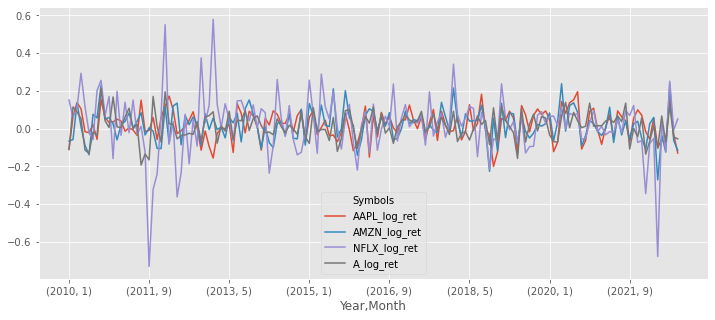

In [26]:
df_log_ret_monthly.plot(figsize=(12, 5))
plt.show()

## <font face="gotham" color="purple"> Example of FX</font>

We can import FX rate from FRED.

In [27]:
start = dt.datetime(1950, 1, 1)
end = dt.datetime.today()
FX = [
    "EURUSD",
    "USDCNY",
    "USDJPY",
    "GBPUSD",
    "USDCAD",
    "USDKRW",
    "USDMXN",
    "USDBRL",
    "AUDUSD",
]

df = data.DataReader(
    [
        "DEXUSEU",
        "DEXCHUS",
        "DEXJPUS",
        "DEXUSUK",
        "DEXCAUS",
        "DEXKOUS",
        "DEXMXUS",
        "DEXBZUS",
        "DEXUSAL",
    ],
    "fred",
    start,
    end,
)
df.columns = FX

In [28]:
df_log_return = np.log(df) - np.log(df.shift(1))

In [29]:
df_log_ret_des = df_log_return.describe()
df_log_ret_des

,EURUSD,USDCNY,USDJPY,GBPUSD,USDCAD,USDKRW,USDMXN,USDBRL,AUDUSD
count,5721.000000,9977.000000,12458.000000,12464.000000,12472.000000,9922.000000,6955.000000,6686.000000,12455.000000
mean,-0.000001,0.000119,-0.000074,-0.000035,0.000009,0.000039,0.000208,0.000162,-0.000038
std,0.005846,0.005099,0.006227,0.005857,0.004100,0.006419,0.008728,0.009894,0.006743
min,-0.030031,-0.024295,-0.056302,-0.081694,-0.050716,-0.132217,-0.179693,-0.089508,-0.192451
25%,-0.003153,-0.000071,-0.002842,-0.002909,-0.001807,-0.001400,-0.003374,-0.004174,-0.002480
50%,-0.000065,0.000000,0.000000,0.000042,0.000000,0.000000,-0.000127,0.000087,0.000000
75%,0.003184,0.000033,0.002944,0.002934,0.001788,0.001251,0.003247,0.004359,0.002804
max,0.046208,0.405459,0.062556,0.045885,0.038070,0.136451,0.193435,0.114410,0.066666


In [30]:
df_log_return["USDCNY"].idxmax()

Timestamp('1994-01-03 00:00:00', freq='B')

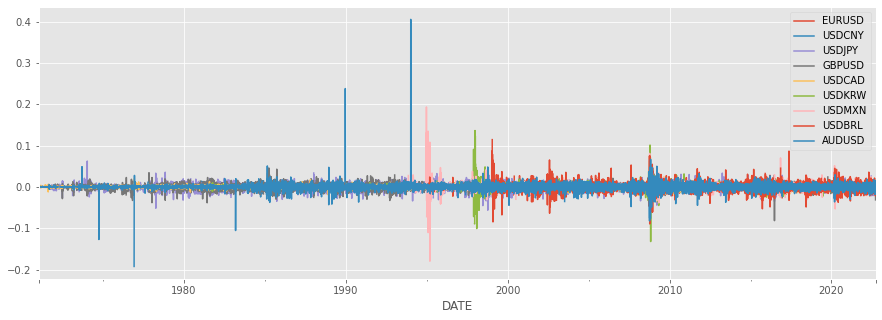

In [31]:
df_log_return.plot(figsize=(15, 5))
plt.show()

If you are wondering why CNY depreciated so much in the beginning of 1994, here is the answer: Chinese govt unified their dual exchange rates system by aligning official and swap center rates, officially devaluing the yuan by 33 percent overnight to 8.7 to the dollar as part of reforms to embrace a 'socialist market economy'. 

Now let's plot the log return distribution, they are much more regular than stock returns. Very likely they are closer to normal distribution.

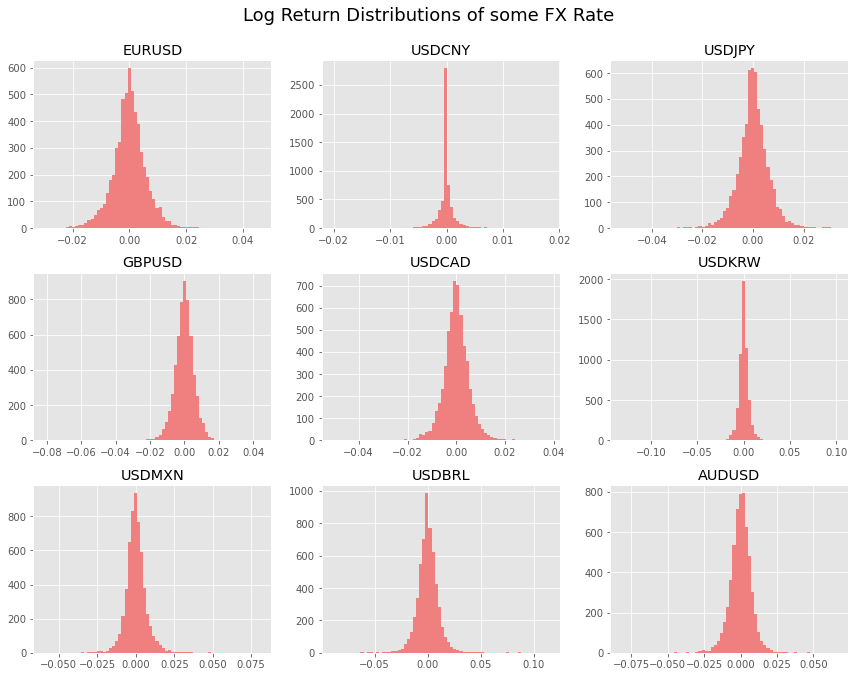

In [32]:
fig = plt.figure(figsize=(12, 9))
FX = [
    "EURUSD",
    "USDCNY",
    "USDJPY",
    "GBPUSD",
    "USDCAD",
    "USDKRW",
    "USDMXN",
    "USDBRL",
    "AUDUSD",
]
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.hist(df_log_return.dropna()[FX[i]], bins=70, color="LightCoral")
    ax.set_title(FX[i])
fig.tight_layout()  # subplot spacing
plt.suptitle("Log Return Distributions of some FX Rate", x=0.5, y=1.04, size=18)
plt.show()

It turns out that EM FX rate return are much more heavy-tailed than stock return.

In [33]:
pd.DataFrame(df_log_return.kurtosis(), columns=["Kurtosis"])

,Kurtosis
EURUSD,2.558334
USDCNY,4476.065490
USDJPY,5.885228
GBPUSD,7.103754
USDCAD,9.737178
USDKRW,99.509961
USDMXN,92.111666
USDBRL,12.713132
AUDUSD,78.483283


The interpretation of skewness of FX is bit different than stocks, the positive numbers means the quote currency (e.g. EURUSD, EUR is base, USD is quote) have shown more tendency of depreciation in the past, i.e. more days of depreciation than appreciation.

In [34]:
pd.DataFrame(df_log_return.skew(), columns=["Skewness"])

,Skewness
EURUSD,0.142290
USDCNY,60.548065
USDJPY,-0.378241
GBPUSD,-0.320210
USDCAD,-0.096983
USDKRW,1.414604
USDMXN,1.949775
USDBRL,0.428075
AUDUSD,-3.263159


Check the $t$-statistics, null hypothesis is rate of change is $0$.

In [35]:
FX = [
    "EURUSD",
    "USDCNY",
    "USDJPY",
    "GBPUSD",
    "USDCAD",
    "USDKRW",
    "USDMXN",
    "USDBRL",
    "AUDUSD",
]
for i in range(9):
    t = df_log_ret_des.loc["mean", FX[i]] / (
        df_log_ret_des.loc["std", FX[i]] / np.sqrt(df_log_ret_des.loc["count", FX[i]])
    )
    s = "t-statistic of " + FX[i] + " is {0:.4f}."
    print(s.format(t))

t-statistic of EURUSD is -0.0189.
t-statistic of USDCNY is 2.3284.
t-statistic of USDJPY is -1.3221.
t-statistic of GBPUSD is -0.6691.
t-statistic of USDCAD is 0.2575.
t-statistic of USDKRW is 0.6021.
t-statistic of USDMXN is 1.9842.
t-statistic of USDBRL is 1.3429.
t-statistic of AUDUSD is -0.6263.
